In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.interpolate import interp1d
%matplotlib inline

In [2]:
plt.rcParams['axes.grid'] = True

In [3]:
roots = [2.2691853142129728, 2.104982167992544, 1.932307699120554, 1.749339162933206, 1.5536238493280832, 1.34187327905057, 1.109960313758399, 0.8541630993606272, 0.5762735442012712, 0.2885386111960936, 0.03198372863548067]
jds = [0.0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9, -1.0]
get_crit_T = dict(zip(jds, roots))
num_temps = 100

In [4]:
def errs(errs):
    return np.array([sum(errs[i*512:(i+1)*512])/512 for i in range(num_temps)])

def stds_err(errs):
    return np.array([np.std(errs[i*512:(i+1)*512]) for i in range(num_temps)])

In [9]:
pred_tc = {}

In [91]:
Jd = -0.5
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

opt_epochs = np.load('opt_epochs.npy', allow_pickle='TRUE').item()
epochs = opt_epochs[Jd]
    
errs_ = []
outs_ = []
Ls = [20, 30, 60, 80, 120]
for i, L in enumerate(Ls):
    num_epochs = epochs[i]
    #with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
        errs_.append(np.load(f)) 
    #with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_modified_tc.npy', 'rb') as f:
        outs_.append(np.load(f))
        
tcs_idxs = []
[tcs_idxs.append(np.argmin(np.abs(0.5 - errs(outs_[j])))) for j in range(len(Ls))]
pred_tc[Jd] = np.mean([T[tcs_idxs[i]] for i in range(5)])

idx = dict(zip([20, 30, 60, 80, 120], tcs_idxs))

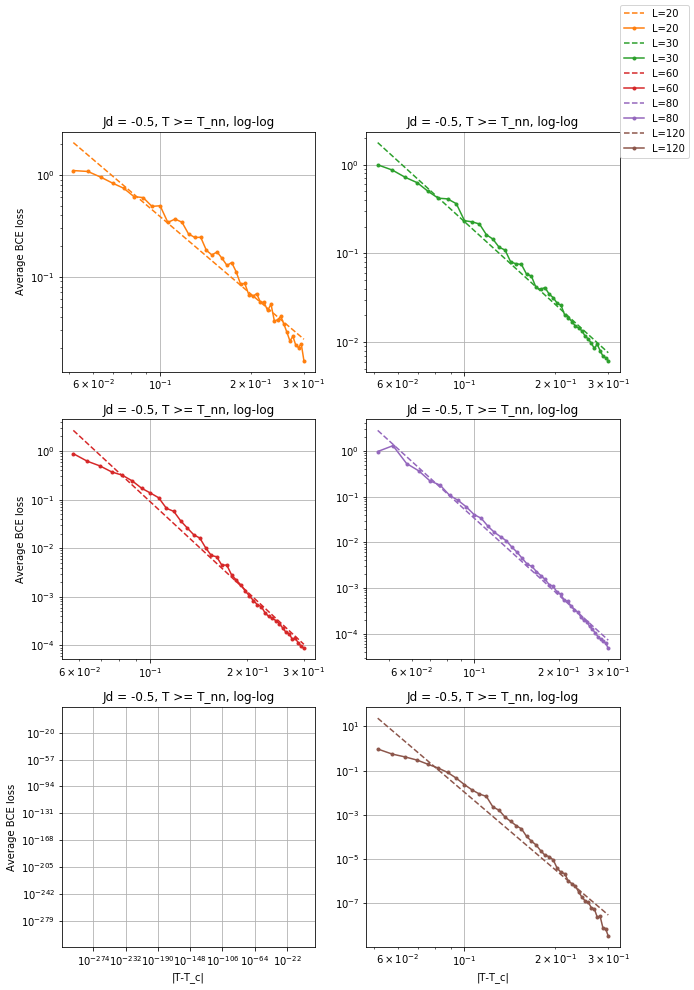

In [92]:
fig, ax = plt.subplots(3, 2, figsize=(10,15))

pf_ = [np.polyfit(np.log(np.abs(T-T_c)[idx[l]:]), np.log(errs(errs_[j])[idx[l]:]), 1) for j,l in enumerate(Ls)]

ax[0, 0].plot(np.abs(T-T_c)[idx[20]:], np.exp(np.poly1d(pf_[0])(np.log(np.abs(T-T_c)))[idx[20]:]), '--', label='L=20', c='C1')
ax[0, 1].plot(np.abs(T-T_c)[idx[30]:], np.exp(np.poly1d(pf_[1])(np.log(np.abs(T-T_c)))[idx[30]:]), '--', label='L=30', c='C2')
ax[1, 0].plot(np.abs(T-T_c)[idx[60]:], np.exp(np.poly1d(pf_[2])(np.log(np.abs(T-T_c)))[idx[60]:]), '--', label='L=60', c='C3')
ax[1, 1].plot(np.abs(T-T_c)[idx[80]:], np.exp(np.poly1d(pf_[3])(np.log(np.abs(T-T_c)))[idx[80]:]), '--', label='L=80', c='C4')
ax[2, 1].plot(np.abs(T-T_c)[idx[120]:], np.exp(np.poly1d(pf_[4])(np.log(np.abs(T-T_c)))[idx[120]:]), '--', label='L=120', c='C5')

ax[0, 0].plot(np.abs(T-T_c)[idx[20]:], errs(errs_[0])[idx[20]:], marker='.', label='L=20', c='C1')
ax[0, 1].plot(np.abs(T-T_c)[idx[30]:], errs(errs_[1])[idx[30]:], marker='.', label='L=30', c='C2')
ax[1, 0].plot(np.abs(T-T_c)[idx[60]:], errs(errs_[2])[idx[60]:], marker='.', label='L=60', c='C3')
ax[1, 1].plot(np.abs(T-T_c)[idx[80]:], errs(errs_[3])[idx[80]:], marker='.', label='L=80', c='C4')
ax[2, 1].plot(np.abs(T-T_c)[idx[120]:], errs(errs_[4])[idx[120]:], marker='.', label='L=120', c='C5')

plt.setp(ax[-1, :], xlabel='|T-T_c|')
plt.setp(ax[:, 0], ylabel='Average BCE loss')
plt.setp(ax, title=f'Jd = {Jd}, T >= T_nn, log-log')

plt.setp(ax[:, :], xscale='log')
plt.setp(ax[:, :], yscale='log')

fig.legend()
fig.savefig(f'images/{Jd}-temps-above-log-log.png')

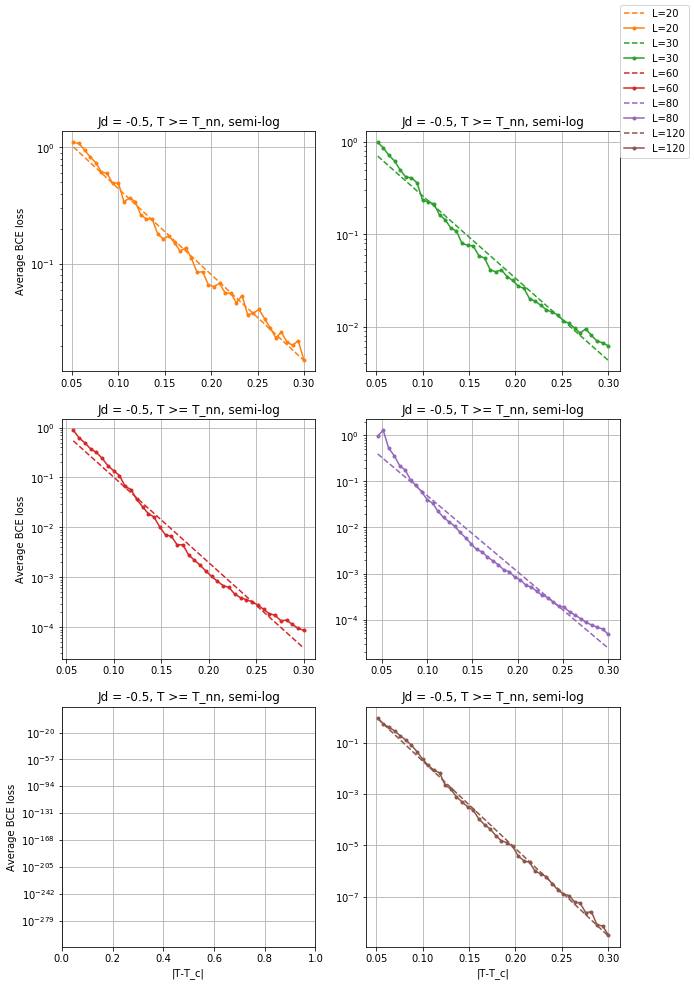

In [93]:
fig, ax = plt.subplots(3, 2, figsize=(10,15))

pf_ = [np.polyfit(np.abs(T-T_c)[idx[l]:], np.log(errs(errs_[j])[idx[l]:]), 1) for j,l in enumerate(Ls)]


ax[0, 0].plot(np.abs(T-T_c)[idx[20]:], np.exp(np.poly1d(pf_[0])(np.abs(T-T_c))[idx[20]:]), '--', label='L=20', c='C1')
ax[0, 1].plot(np.abs(T-T_c)[idx[30]:], np.exp(np.poly1d(pf_[1])(np.abs(T-T_c))[idx[30]:]), '--', label='L=30', c='C2')
ax[1, 0].plot(np.abs(T-T_c)[idx[60]:], np.exp(np.poly1d(pf_[2])(np.abs(T-T_c))[idx[60]:]), '--', label='L=60', c='C3')
ax[1, 1].plot(np.abs(T-T_c)[idx[80]:], np.exp(np.poly1d(pf_[3])(np.abs(T-T_c))[idx[80]:]), '--', label='L=80', c='C4')
ax[2, 1].plot(np.abs(T-T_c)[idx[120]:], np.exp(np.poly1d(pf_[4])(np.abs(T-T_c))[idx[120]:]), '--', label='L=120', c='C5')

ax[0, 0].plot(np.abs(T-T_c)[idx[20]:], errs(errs_[0])[idx[20]:], marker='.', label='L=20', c='C1')
ax[0, 1].plot(np.abs(T-T_c)[idx[30]:], errs(errs_[1])[idx[30]:], marker='.', label='L=30', c='C2')
ax[1, 0].plot(np.abs(T-T_c)[idx[60]:], errs(errs_[2])[idx[60]:], marker='.', label='L=60', c='C3')
ax[1, 1].plot(np.abs(T-T_c)[idx[80]:], errs(errs_[3])[idx[80]:], marker='.', label='L=80', c='C4')
ax[2, 1].plot(np.abs(T-T_c)[idx[120]:], errs(errs_[4])[idx[120]:], marker='.', label='L=120', c='C5')

plt.setp(ax[-1, :], xlabel='|T-T_c|')
plt.setp(ax[:, 0], ylabel='Average BCE loss')
plt.setp(ax, title=f'Jd = {Jd}, T >= T_nn, semi-log')

#plt.setp(ax[:, :], xscale='log')
plt.setp(ax[:, :], yscale='log')

fig.legend()
fig.savefig(f'images/{Jd}-temps-above-semi-log.png')

In [94]:
idxs_two = [np.argmin(np.abs(np.abs(T-T_c)[idx[l]:] - 0.15)) for l in Ls]
idx_2 = dict(zip([20, 30, 60, 80, 120], idxs_two))
idx_2[80]

17

In [95]:
idxs_two = [np.argmin(np.abs(np.abs(T-T_c)[idx[l]:] - 0.1)) for l in Ls]
idx_2 = dict(zip([20, 30, 60, 80, 120], idxs_two))
idx_2[80]

9

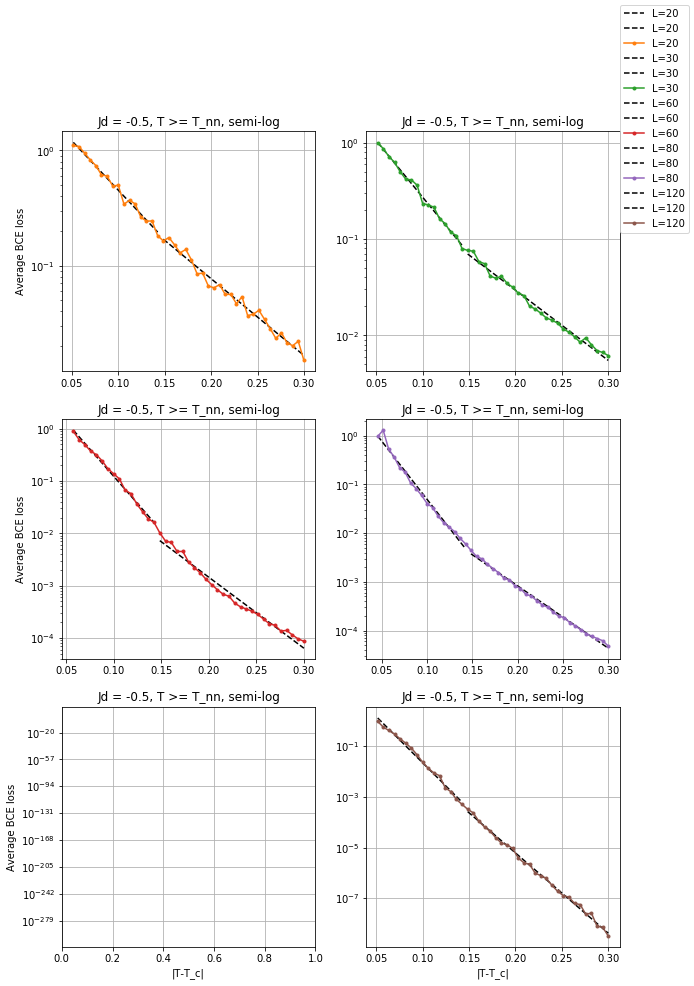

In [99]:
fig, ax = plt.subplots(3, 2, figsize=(10,15))

pf_l = [np.polyfit(np.abs(T-T_c)[idx[l]:idx_2[l]+idx[l]], np.log(errs(errs_[j])[idx[l]:idx_2[l]+idx[l]]), 1) for j,l in enumerate(Ls)]
pf_r = [np.polyfit(np.abs(T-T_c)[idx_2[l]+idx[l]:], np.log(errs(errs_[j])[idx_2[l]+idx[l]:]), 1) for j,l in enumerate(Ls)]


ax[0, 0].plot(np.abs(T-T_c)[idx[20]:idx_2[20]+idx[20]], np.exp(np.poly1d(pf_l[0])(np.abs(T-T_c))[idx[20]:idx_2[20]+idx[20]]), '--', label='L=20', c='black')
ax[0, 1].plot(np.abs(T-T_c)[idx[30]:idx_2[30]+idx[30]], np.exp(np.poly1d(pf_l[1])(np.abs(T-T_c))[idx[30]:idx_2[30]+idx[30]]), '--', label='L=30', c='black')
ax[1, 0].plot(np.abs(T-T_c)[idx[60]:idx_2[60]+idx[60]], np.exp(np.poly1d(pf_l[2])(np.abs(T-T_c))[idx[60]:idx_2[60]+idx[60]]), '--', label='L=60', c='black')
ax[1, 1].plot(np.abs(T-T_c)[idx[80]:idx_2[80]+idx[80]], np.exp(np.poly1d(pf_l[3])(np.abs(T-T_c))[idx[80]:idx_2[80]+idx[80]]), '--', label='L=80', c='black')
ax[2, 1].plot(np.abs(T-T_c)[idx[120]:idx_2[120]+idx[120]], np.exp(np.poly1d(pf_l[4])(np.abs(T-T_c))[idx[120]:idx_2[120]+idx[120]]), '--', label='L=120', c='black')

ax[0, 0].plot(np.abs(T-T_c)[idx[20]+idx_2[20]:], np.exp(np.poly1d(pf_r[0])(np.abs(T-T_c))[idx_2[20]+idx[20]:]), '--', label='L=20', c='black')
ax[0, 1].plot(np.abs(T-T_c)[idx[30]+idx_2[30]:], np.exp(np.poly1d(pf_r[1])(np.abs(T-T_c))[idx_2[30]+idx[30]:]), '--', label='L=30', c='black')
ax[1, 0].plot(np.abs(T-T_c)[idx[60]+idx_2[60]:], np.exp(np.poly1d(pf_r[2])(np.abs(T-T_c))[idx_2[60]+idx[60]:]), '--', label='L=60', c='black')
ax[1, 1].plot(np.abs(T-T_c)[idx[80]+idx_2[80]:], np.exp(np.poly1d(pf_r[3])(np.abs(T-T_c))[idx_2[80]+idx[80]:]), '--', label='L=80', c='black')
ax[2, 1].plot(np.abs(T-T_c)[idx[120]+idx_2[120]:], np.exp(np.poly1d(pf_r[4])(np.abs(T-T_c))[idx_2[120]+idx[120]:]), '--', label='L=120', c='black')

ax[0, 0].plot(np.abs(T-T_c)[idx[20]:], errs(errs_[0])[idx[20]:], marker='.', label='L=20', c='C1')
ax[0, 1].plot(np.abs(T-T_c)[idx[30]:], errs(errs_[1])[idx[30]:], marker='.', label='L=30', c='C2')
ax[1, 0].plot(np.abs(T-T_c)[idx[60]:], errs(errs_[2])[idx[60]:], marker='.', label='L=60', c='C3')
ax[1, 1].plot(np.abs(T-T_c)[idx[80]:], errs(errs_[3])[idx[80]:], marker='.', label='L=80', c='C4')
ax[2, 1].plot(np.abs(T-T_c)[idx[120]:], errs(errs_[4])[idx[120]:], marker='.', label='L=120', c='C5')

plt.setp(ax[-1, :], xlabel='|T-T_c|')
plt.setp(ax[:, 0], ylabel='Average BCE loss')
plt.setp(ax, title=f'Jd = {Jd}, T >= T_nn, semi-log')

#plt.setp(ax[:, :], xscale='log')
plt.setp(ax[:, :], yscale='log')

fig.legend()
fig.savefig(f'images/{Jd}-temps-above-semi-log.png')

In [100]:
pf_l = np.array(pf_l)
pf_l[:, 0]

array([-19.72689761, -27.04032562, -47.82688811, -55.01516857,
       -83.99781724])

In [101]:
pf_r = np.array(pf_r)
pf_r[:, 0]

array([-15.33466105, -16.78401062, -31.23661495, -29.45230396,
       -72.81969039])

In [102]:
list(map(lambda x: 1/x, pf_l[:, 0]))

[-0.05069220816890416,
 -0.03698180317447097,
 -0.02090874065889739,
 -0.01817680516158775,
 -0.011905071261391032]

In [103]:
list(map(lambda x: 1/x, pf_r[:, 0]))

[-0.06521174461438511,
 -0.05958051520648684,
 -0.0320137121595548,
 -0.033953201132202376,
 -0.01373254946170225]

In [104]:
list(map(lambda x: np.exp(x), pf_r[:, 1]))

[1.650786370172157,
 0.8458909280524106,
 0.7480691854519153,
 0.2976202171045744,
 12.915794283804594]